# INTRODUCTION

Training of Prostate Cancer data with Spuervised and Unsupervised machine learning Models

## Process

* EDA (Exploratory Data Analysis)
* Data Preprocessing (Scaling, Reshaping)
* Test-Train Datas Split
* ML Models
* Compare all of these Classification Models
* Conclusion

## ML Models
**Supervised**
* Logistic Regression Classification
* KNN Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Desicion Tree Classification
* Random Forest Classification

**Unsupervised**
* PCA

**Attributes Description:**
* id
* diagnosis_result - diagnosis result [B: Benign ; M: Malignant]
* radius
* texture
* perimeter
* area
* smoothness
* compactness
* symmetry
* fractal_dimension

# Data Preprocessing

#Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import confusion_matrix, classification_report
# from google.colab import files

# uploaded = files.upload()

In [ ]:
url='https://drive.google.com/file/d/1TwYiEztUSx-OMDwJiR2hSJaWdQ2CqJso/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
PC = pd.read_csv(dwn_url)
PC.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Data Cleaning


In [ ]:
#Dropping ID Column
PC.drop(['id'],axis=1,inplace=True)

#Null and Missing Data
null_counts = PC.isnull().sum()
print("Null entries per column: ", null_counts)

print()
#Repeating Data
duplicates = PC[PC.duplicated()]
print("Duplicate rows: ", duplicates)

# print()
# #Check if all numeric
for column in PC.columns[1:]:
    all_numeric = pd.to_numeric(PC[column], errors='coerce').notnull().all()
    print(f"All entries in '{column}' are numeric: {all_numeric}")

print()
#Checking for negative
for column in PC.columns[1:]:
    has_negative_values = (PC[column] < 0).any()
    print(f"Has {column} have negative values?", has_negative_values)


Null entries per column:  diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

Duplicate rows:  Empty DataFrame
Columns: [diagnosis_result, radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension]
Index: []
All entries in 'radius' are numeric: True
All entries in 'texture' are numeric: True
All entries in 'perimeter' are numeric: True
All entries in 'area' are numeric: True
All entries in 'smoothness' are numeric: True
All entries in 'compactness' are numeric: True
All entries in 'symmetry' are numeric: True
All entries in 'fractal_dimension' are numeric: True

Has radius have negative values? False
Has texture have negative values? False
Has perimeter have negative values? False
Has area have negative values? False
Has smoothness have negative values? False
Has compactness have negative va

In [ ]:
PC.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [ ]:
PC.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
PC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [ ]:
PC.columns
print(PC.shape)

(100, 9)


### Outliers

In [ ]:
columns_of_interest=['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

#Computing for IQR
Q1 = PC[columns_of_interest].quantile(0.25)
Q3 = PC[columns_of_interest].quantile(0.75)
IQR = Q3-Q1
print(IQR)

radius                 9.0000
texture                8.2500
perimeter             31.7500
area                 440.2500
smoothness             0.0185
compactness            0.0765
symmetry               0.0370
fractal_dimension      0.0100
dtype: float64


In [ ]:
#Removing outliers
PC_no_outliers = PC[~((PC[columns_of_interest] < (Q1 - 3 * IQR)) | (PC[columns_of_interest] > (Q3 + 3 * IQR))).any(axis=1)]

# Print the DataFrame with outliers removed
PC_no_outliers.shape #Result (100, 10); No outliers


(100, 9)

###Encoding

In [ ]:
PC.diagnosis_result = [1 if each == 'M' else 0 for each in PC.diagnosis_result] # binary classification (1 - malignant, 0 - benign)

### Assigning of y & x

** We then assign y for the classification and x for the features excluding the diagnosis_result**

In [ ]:
# assign x and y values for test-train datas split
y = PC.diagnosis_result.values #Extract the values of the 'diagnosis_result' column as the target variable 'y'
x_data = PC.drop(['diagnosis_result'],axis=1) #Create a new DataFrame 'x_data' by dropping the 'diagnosis_result' column

In [ ]:
y # Check y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
x_data.head() # check the new data frame

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


# Data Transformation

### Data Normalization/Feature Selection

In [ ]:
# normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # scaling is bet 0 and 1
x = scaler.fit_transform(x_data)

In [ ]:
# x # check if indeed 0 - 1

# Exploratory Data Analysis (EDA)

Target/Label Feature diagnosis_result

- lets see the distrobution of B and M

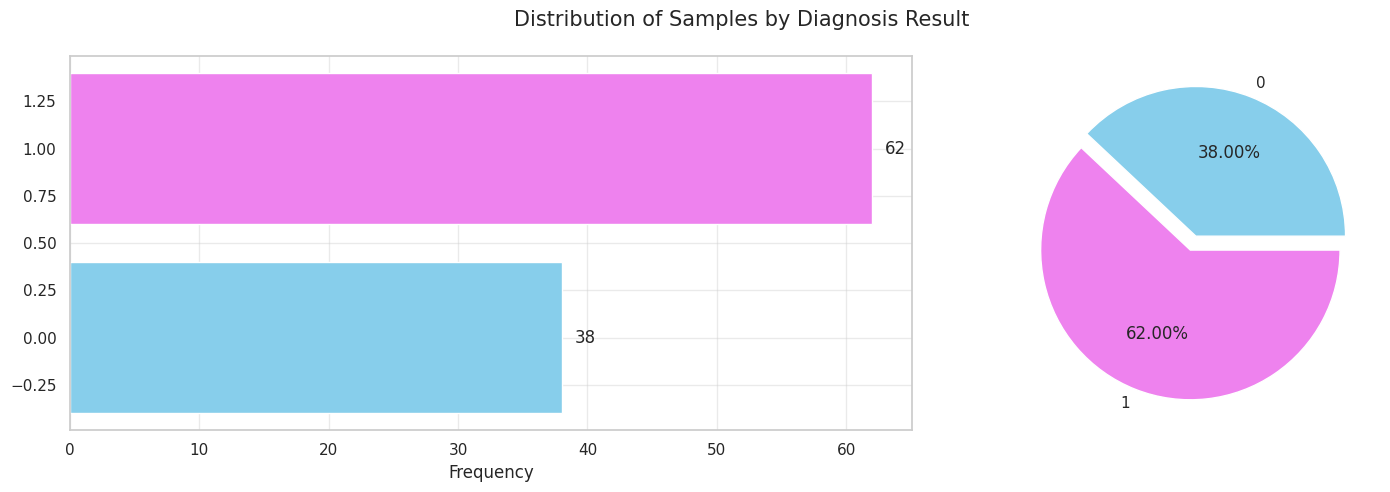

In [ ]:
# distribution of samples by diagnosis result
diagnosis = PC['diagnosis_result'].value_counts().sort_index()

colors = ['skyblue','violet','orange','lightgreen','lemonchiffon','lightcoral','lightcyan','lightsalmon','mistyrose']

# visualiazation (bar chart & pie chart)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=diagnosis.index, width=diagnosis.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(diagnosis):
    axes[0].text(values+1, index, str(values), va='center')

axes[0].grid(alpha=0.4)

axes[1].pie(diagnosis.values, labels=diagnosis.index, explode=([0.05]*len(diagnosis.index)), colors=colors, autopct='%.2f%%')
figure.suptitle('Distribution of Samples by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
PC.diagnosis_result.value_counts() # verify

1    62
0    38
Name: diagnosis_result, dtype: int64

** Based on this, we have an imbalance dataset**

Distribution of Predictors

In [ ]:
PC.describe()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


Question | Is there a statistical significant difference of the:
* radius
* texture
* perimeter
* area
* smoothness
* compactness
* symmetry
* fractal_dimension


between benign and malignant patients?

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,17.947368,5.061499,9.0,14.25,18.0,22.0,25.0
1,62.0,16.177419,4.678252,9.0,11.00,16.0,20.0,25.0



T-test results for radius:
Test statistic: 1.78
Test p-value: 0.0782
There is insufficient evidence to conclude a statistically significant difference in the mean radius between benign and malignant patients.



,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,17.763158,5.185396,11.0,13.25,17.0,21.75,27.0
1,62.0,18.516129,5.218950,11.0,14.00,18.0,22.75,27.0



T-test results for texture:
Test statistic: -0.702
Test p-value: 0.4843
There is insufficient evidence to conclude a statistically significant difference in the mean texture between benign and malignant patients.



,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,78.500000,17.478558,52.0,66.75,78.5,86.0,133.0
1,62.0,107.983871,19.715594,72.0,94.00,104.0,122.0,172.0



T-test results for perimeter:
Test statistic: -7.5711
Test p-value: 0.0
There is a statistically significant difference in the mean perimeter between benign and malignant patients.


,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,474.342105,219.603731,202.0,332.5,458.5,545.75,1326.0
1,62.0,842.951613,290.103680,371.0,643.5,790.5,1075.75,1878.0



T-test results for area:
Test statistic: -6.734
Test p-value: 0.0
There is a statistically significant difference in the mean area between benign and malignant patients.


,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,0.099053,0.015194,0.074,0.08850,0.0980,0.1065,0.143
1,62.0,0.104984,0.013940,0.070,0.09425,0.1045,0.1140,0.143



T-test results for smoothness:
Test statistic: -1.9957
Test p-value: 0.0487
There is a statistically significant difference in the mean smoothness between benign and malignant patients.


,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,0.086895,0.042450,0.038,0.05600,0.0785,0.094,0.246
1,62.0,0.151097,0.058159,0.051,0.10925,0.1405,0.182,0.345



T-test results for compactness:
Test statistic: -5.9043
Test p-value: 0.0
There is a statistically significant difference in the mean compactness between benign and malignant patients.


,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,0.184053,0.029971,0.135,0.16800,0.182,0.19375,0.274
1,62.0,0.198758,0.030162,0.153,0.17925,0.193,0.21300,0.304



T-test results for symmetry:
Test statistic: -2.3722
Test p-value: 0.0196
There is a statistically significant difference in the mean symmetry between benign and malignant patients.


,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
0,38.0,0.064605,0.007810,0.053,0.059,0.0635,0.06900,0.090
1,62.0,0.064742,0.008415,0.053,0.059,0.0630,0.06875,0.097



T-test results for fractal_dimension:
Test statistic: -0.081
Test p-value: 0.9356
There is insufficient evidence to conclude a statistically significant difference in the mean fractal_dimension between benign and malignant patients.



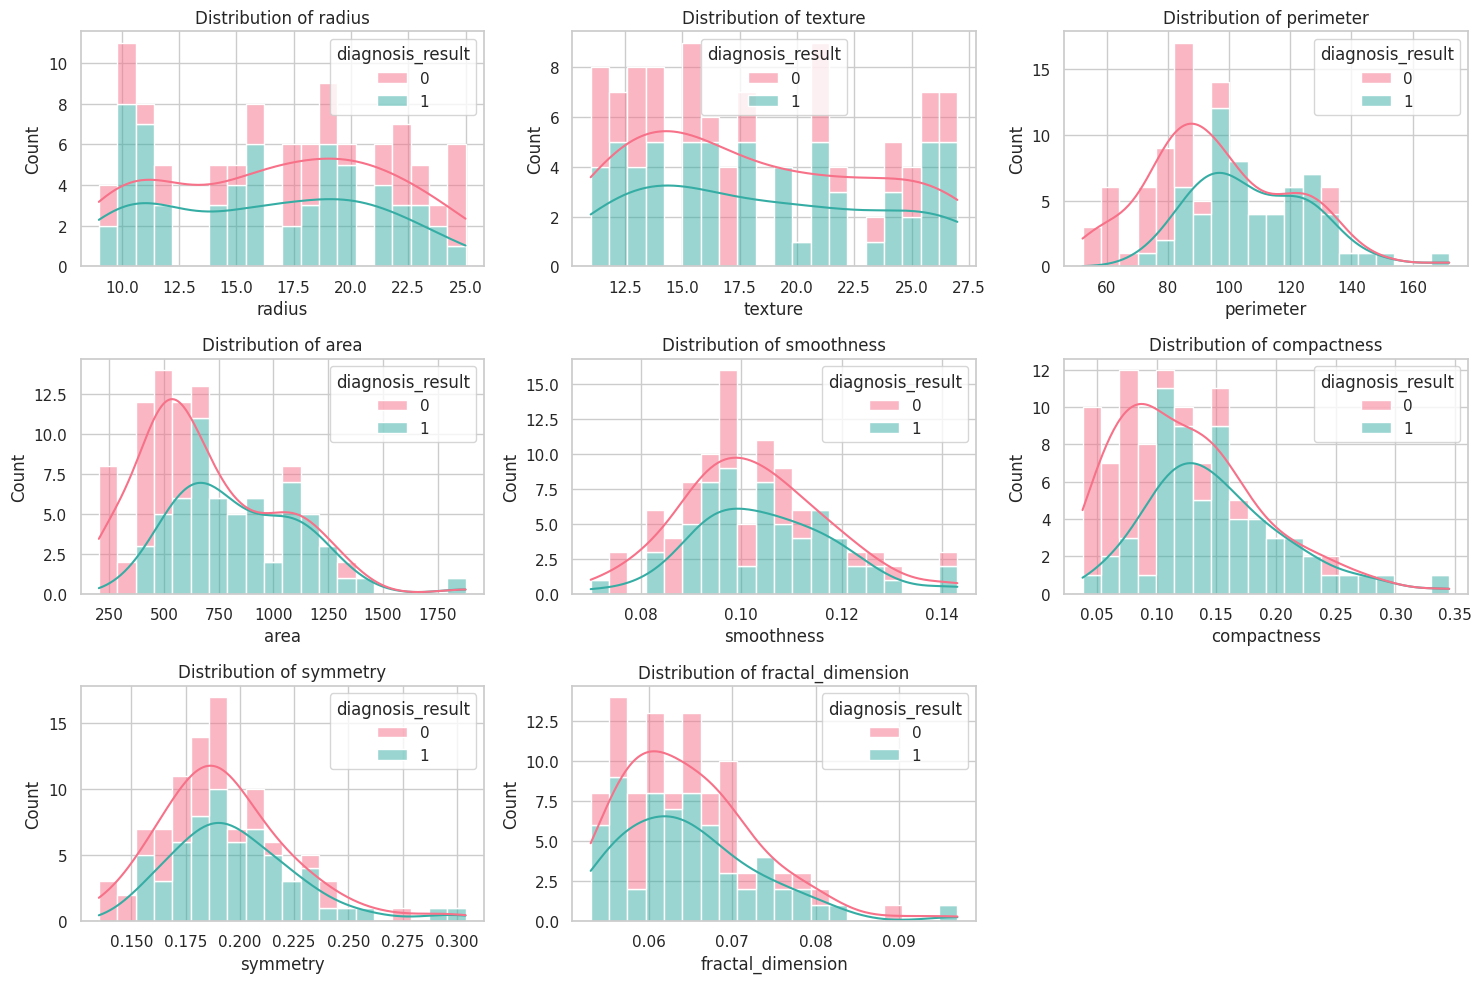

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

# Select the predictors for distribution visualization
predictors = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "symmetry", "fractal_dimension"]

# Plot histograms for each predictor, colored by diagnosis_result
plt.figure(figsize=(15, 10))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=PC, x=predictor, hue='diagnosis_result', bins=20, kde=True, multiple="stack", palette="husl")
    plt.title(f'Distribution of {predictor}')

    # Display summary statistics
    display(PC.groupby('diagnosis_result')[predictor].describe())

    # Perform independent T test to compare the mean between benign and malignant patients
    df = PC.groupby('diagnosis_result')
    benign = df.get_group(0)
    malignant = df.get_group(1)

    res = ttest_ind(benign[predictor], malignant[predictor])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print(f'\nT-test results for {predictor}:')
    print('Test statistic:', test_stat)
    print('Test p-value:', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'There is a statistically significant difference in the mean {predictor} between benign and malignant patients.')
        print
    else:
        print(f'There is insufficient evidence to conclude a statistically significant difference in the mean {predictor} between benign and malignant patients.')
        print()

plt.tight_layout()
plt.show()


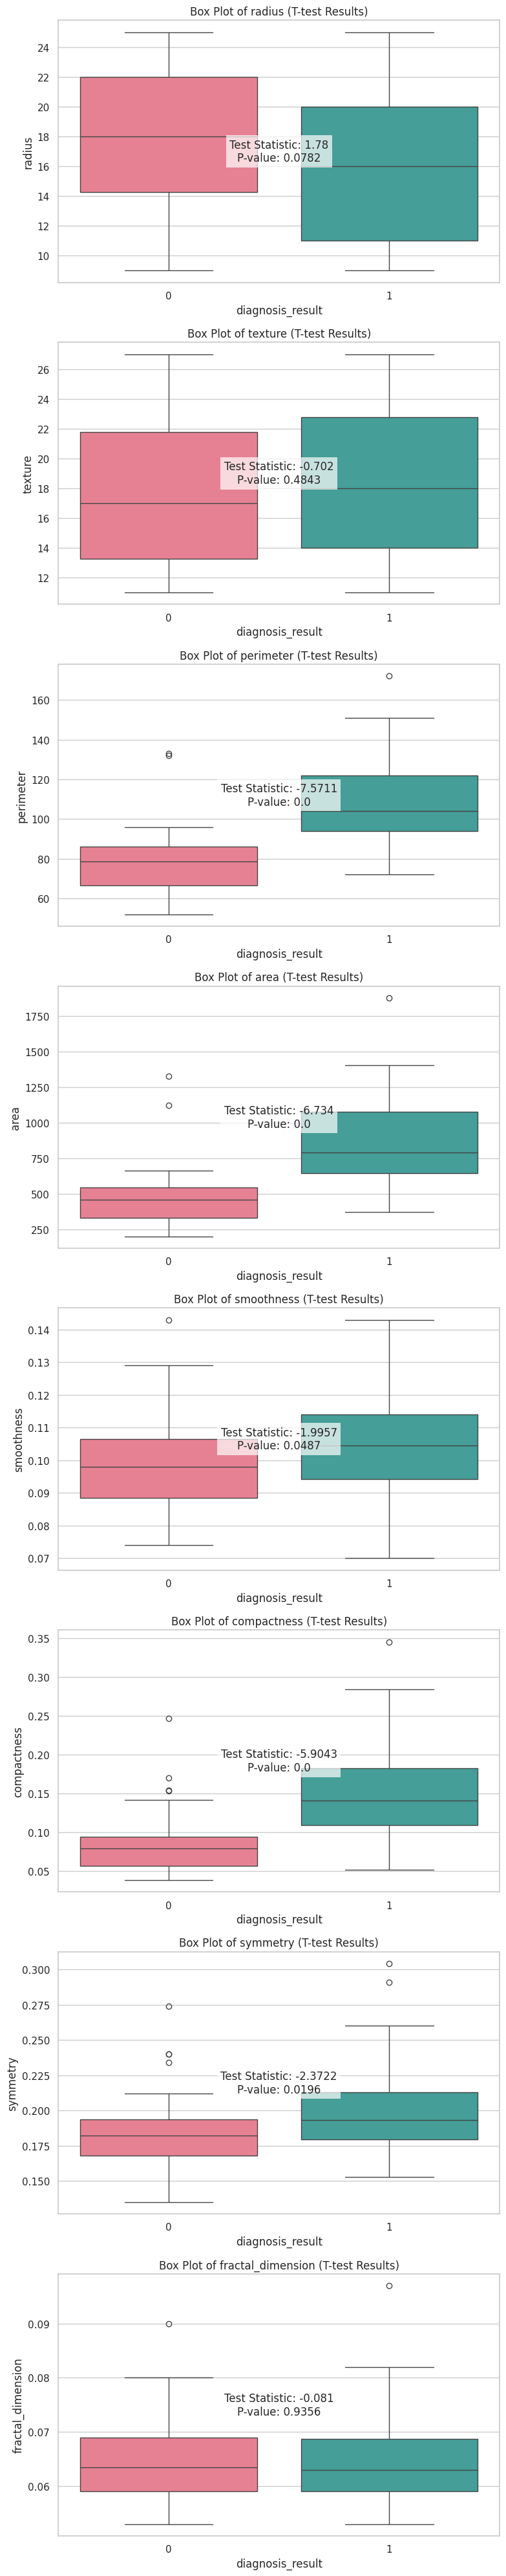

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Select the predictors for box plot visualization
predictors = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "symmetry", "fractal_dimension"]

# Create subplots for box plots
plt.figure(figsize=(15, 5 * len(predictors)))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(len(predictors), 2, i * 2 - 1)

    # Perform independent T test to compare the mean between benign and malignant patients
    df = PC.groupby('diagnosis_result')
    benign = df.get_group(0)
    malignant = df.get_group(1)

    res = ttest_ind(benign[predictor], malignant[predictor])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    # Box plot for T-test results
    sns.boxplot(x='diagnosis_result', y=predictor, data=PC, hue='diagnosis_result', palette="husl", legend=False)
    plt.title(f'Box Plot of {predictor} (T-test Results)')

    # Display T-test results on the box plot
    plt.text(0.5, 0.5, f'Test Statistic: {test_stat}\nP-value: {pvalue}', horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()
plt.show()


# Train and Test Split

In [ ]:
# split datas as train and test
from sklearn.model_selection import train_test_split

# x: Feature variables, y: Target variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# 80% training and 20% testing

# for conclusion
method_names=[]
method_scores=[]

#Feature Selection

### Method 1: Feature Correlation


**Correlation Matrix**

Correlation between Features

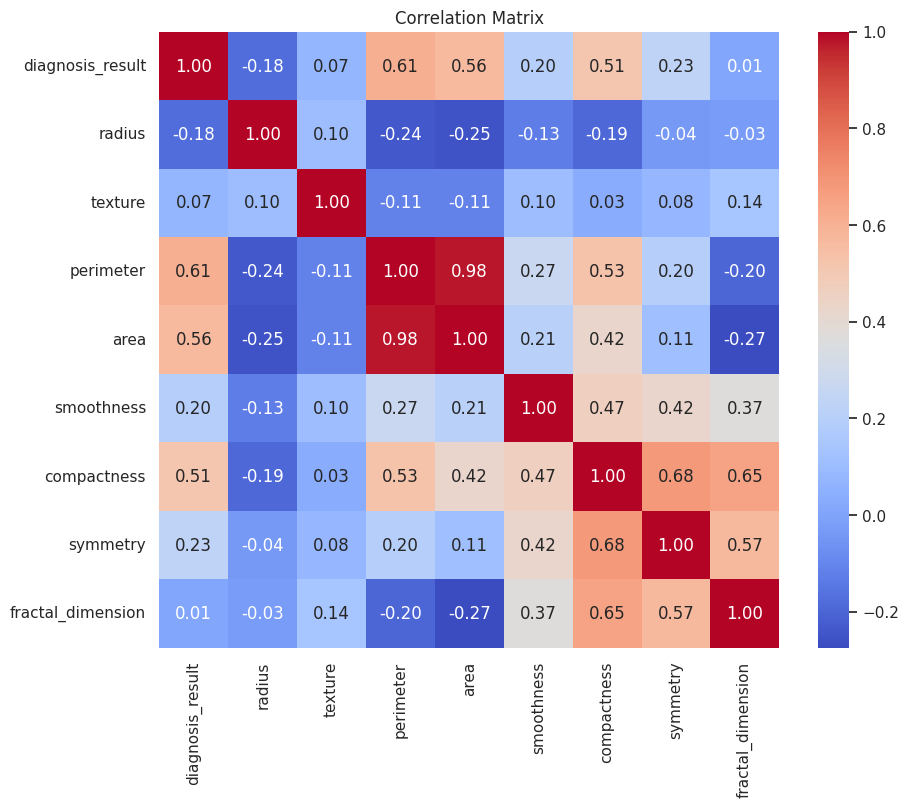

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'diagnosis_result' and 'diagnosis_label' columns if they are present
# PC = PC.drop(['diagnosis_result', 'diagnosis_label'], axis=1, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = PC.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix')
plt.show()


Area and perimeter has a very high correlation (0.98). Thus, we must remove one of them.

Since perimeter has a higher correlation with our target value (diagnosis_result), we will eliminate area instead.

###Method 2: ANOVA Kbest

We use SelectKBest Annova

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_names = x_data.columns.tolist()

# Use ANOVA for feature selection
selector = SelectKBest(f_classif, k=6)

# Fit the selector on training data
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# All scores
all_feature_scores = selector.scores_
all_feature_names = feature_names
feature_score_pairs = list(zip(all_feature_names, all_feature_scores))
for feature_name, score in feature_score_pairs:
    print(f"Feature: {feature_name}, Score: {score}")

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = np.array(feature_names)[selected_features_indices]

# Print or display the names of the selected features
print("Selected Feature Indices:", selected_features_indices)
print("Selected Features:", selected_features_names)



Feature: radius, Score: 5.2900826966292005
Feature: texture, Score: 0.3671381571047713
Feature: perimeter, Score: 54.55043166932568
Feature: area, Score: 39.832666066549116
Feature: smoothness, Score: 3.420604055739601
Feature: compactness, Score: 34.7990267101736
Feature: symmetry, Score: 9.28006022738266
Feature: fractal_dimension, Score: 0.12462659122633198
Selected Feature Indices: [0 2 3 4 5 6]
Selected Features: ['radius' 'perimeter' 'area' 'smoothness' 'compactness' 'symmetry']


###Removal Features

Method 1:
We removed features below 0.1 and above 9.0
*   Area
*   Fractal_dimension
*   Texture

Method 2:
*   Texture
*   Fractal_dimension







In [ ]:
x_data.drop(['area', 'texture', 'fractal_dimension'],axis=1,inplace=True)

In [ ]:
x_data.head()

,radius,perimeter,smoothness,compactness,symmetry
0,23,151,0.143,0.278,0.242
1,9,133,0.143,0.079,0.181
2,21,130,0.125,0.160,0.207
3,14,78,0.070,0.284,0.260
4,9,135,0.141,0.133,0.181


In [ ]:
x_data.shape

(100, 5)

In [ ]:
# Extract feature names
# Storing data frame to a variable
feature_names = x_data.columns.tolist()

**Interpretation**

* This implies that the variable "area" is likely to be a relevant and informative feature in distinguishing between benign and malignant cases.


* This means that the variable "fractal dimension" may not be a strong predictor for distinguishing between benign and malignant cases, as the observed difference in means could likely occur due to random chance.


* Etc

# Use of ML Models

## **Supervised methods**

*   Support vector machine (SVM)
*   Decision tree
*   Random Forest
*   KNN
*   Logistic Regression
*   Naive Bayes

### Support Vector Machines

SVM Classification Score on Test Set: 0.75
[[ 2  2]
 [ 3 13]]


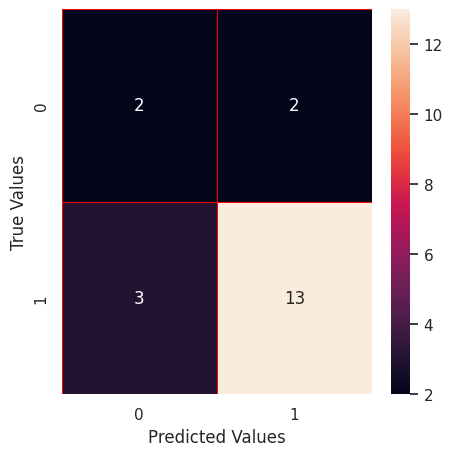

SVM Classification report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.87      0.81      0.84        16

    accuracy                           0.75        20
   macro avg       0.63      0.66      0.64        20
weighted avg       0.77      0.75      0.76        20



In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Create SVM classifier
svm = SVC(random_state=42, gamma='scale', probability=True)

# Fit the SVM model on the resampled training data
svm.fit(x_train_selected, y_train)
y_probs = svm.decision_function(x_test_selected)

# Evaluate the model on the original test set
print("SVM Classification Score on Test Set: {}".format(svm.score(x_test_selected, y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test_selected, y_test))

# Confusion Matrix
y_pred = svm.predict(x_test_selected)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Classification report
print("SVM Classification report:\n", classification_report(y_test, y_pred))

AUPRC Score is: 0.936721040397511


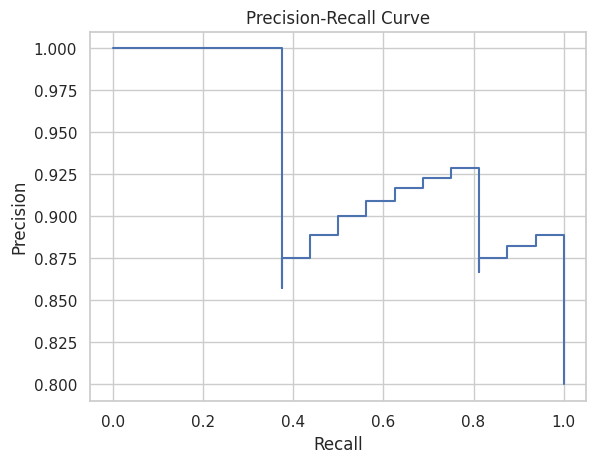

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate AUPRC
auprc = average_precision_score(y_test, y_probs)

# Print AUPRC
print("AUPRC Score is: {}".format(auprc))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

### Random Forest

Random Forest Classification Score:  0.7

[[ 1  3]
 [ 3 13]]


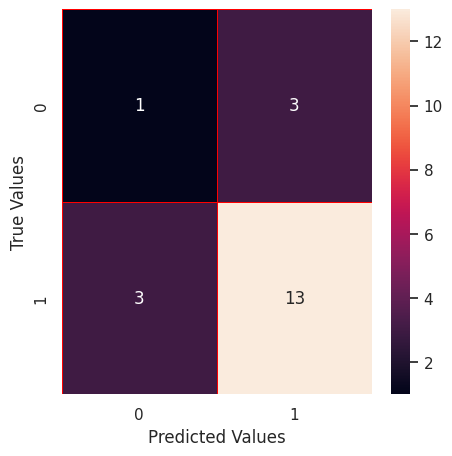


Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.81      0.81      0.81        16

    accuracy                           0.70        20
   macro avg       0.53      0.53      0.53        20
weighted avg       0.70      0.70      0.70        20



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train_selected,y_train)
y_probs = rand_forest.predict_proba(x_test_selected)[:, 1]

print("Random Forest Classification Score: ",rand_forest.score(x_test_selected,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test_selected,y_test))

print()
#Confusion Matrix
y_pred = rand_forest.predict(x_test_selected)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print()
#Classification report
print("Random Forest Classification report:\n", classification_report(y_test, y_pred))

AUPRC Score is: 0.8696727944720398


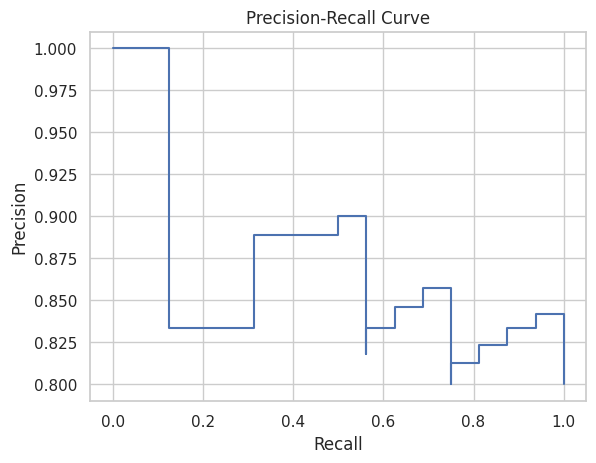

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate AUPRC
auprc = average_precision_score(y_test, y_probs)

# Print AUPRC
print("AUPRC Score is: {}".format(auprc))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

### KNN Classification

Score for Number of Neighbors = 5: 0.75

[[ 2  2]
 [ 3 13]]


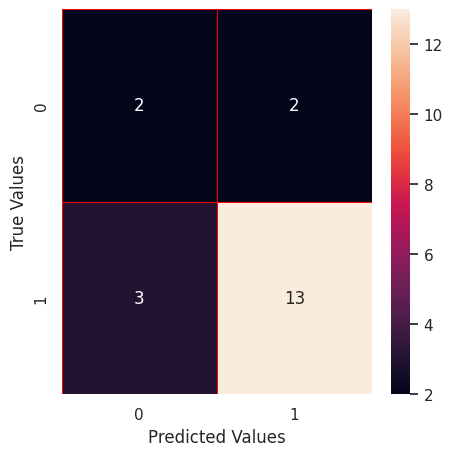


KNN Classification report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.87      0.81      0.84        16

    accuracy                           0.75        20
   macro avg       0.63      0.66      0.64        20
weighted avg       0.77      0.75      0.76        20



In [ ]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_selected, y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test_selected, y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test_selected, y_test))

print()
# Confusion Matrix
y_pred = knn.predict(x_test_selected)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print()
# Classification report with zero_division parameter
print("KNN Classification report:\n", classification_report(y_test, y_pred, zero_division=1))


AUPRC Score is: 0.8696727944720398


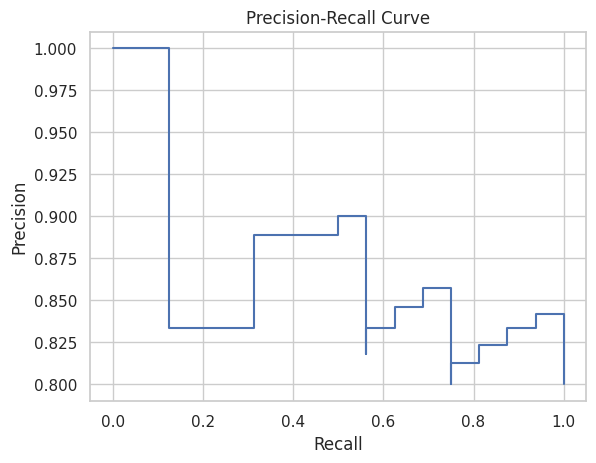

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate AUPRC
auprc = average_precision_score(y_test, y_probs)

# Print AUPRC
print("AUPRC Score is: {}".format(auprc))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

### Logistic Regression


Logistic Regression Classification Test Accuracy 0.8



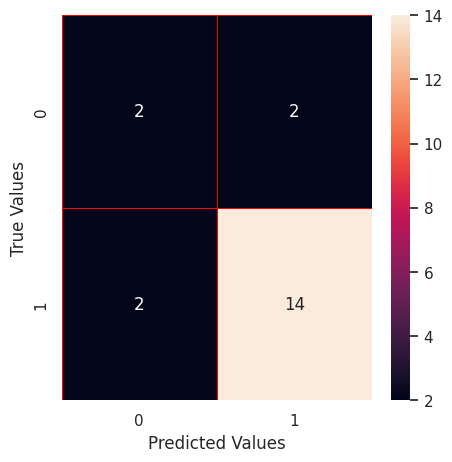


Logistic Regression Classification Report 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.88      0.88      0.88        16

    accuracy                           0.80        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(solver='lbfgs')  # or any other solver of your choice
log_reg.fit(x_train_selected, y_train)
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test_selected, y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test_selected, y_test))

print()
# Confusion Matrix
y_pred = log_reg.predict(x_test_selected)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print()
#Classification Report
print("Logistic Regression Classification Report \n", classification_report(y_test, y_pred))


AUPRC Score is: 0.8696727944720398


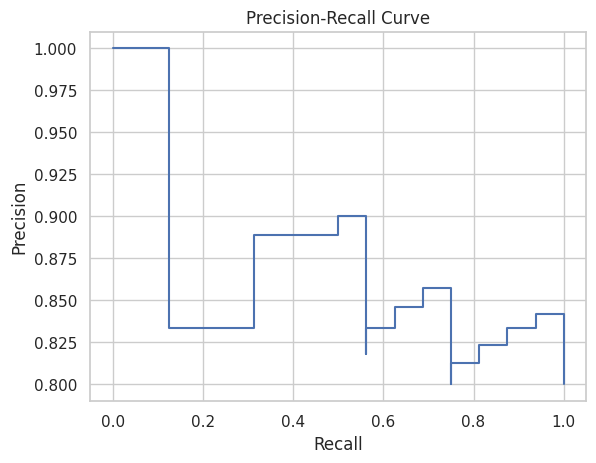

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate AUPRC
auprc = average_precision_score(y_test, y_probs)

# Print AUPRC
print("AUPRC Score is: {}".format(auprc))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

### Naive Bayes

Naive Bayes Classification Score: 0.65

[[ 2  2]
 [ 5 11]]


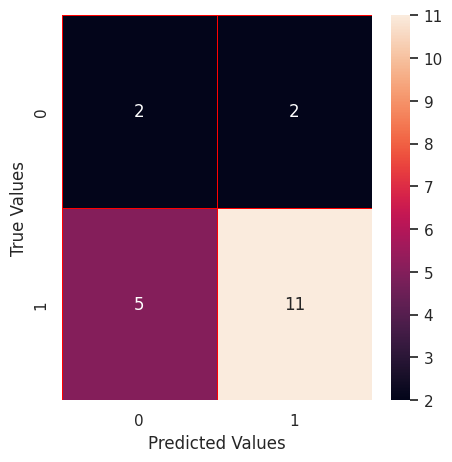


Naive Bayes Classification report:
               precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.85      0.69      0.76        16

    accuracy                           0.65        20
   macro avg       0.57      0.59      0.56        20
weighted avg       0.73      0.65      0.68        20



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight

naive_bayes = GaussianNB()
naive_bayes.fit(x_train_selected, y_train)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test_selected,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test_selected,y_test))

print()
#Confusion Matrix
y_pred = naive_bayes.predict(x_test_selected)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print()
#Classification report
print("Naive Bayes Classification report:\n", classification_report(y_test, y_pred))

AUPRC Score is: 0.8696727944720398


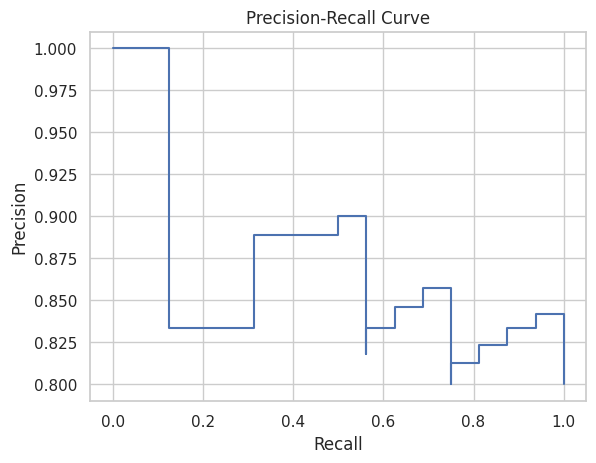

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate AUPRC
auprc = average_precision_score(y_test, y_probs)

# Print AUPRC
print("AUPRC Score is: {}".format(auprc))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

#Conclusion

Text(0.5, 1.0, 'Accuracy Score Comparison for Different Classifiers')

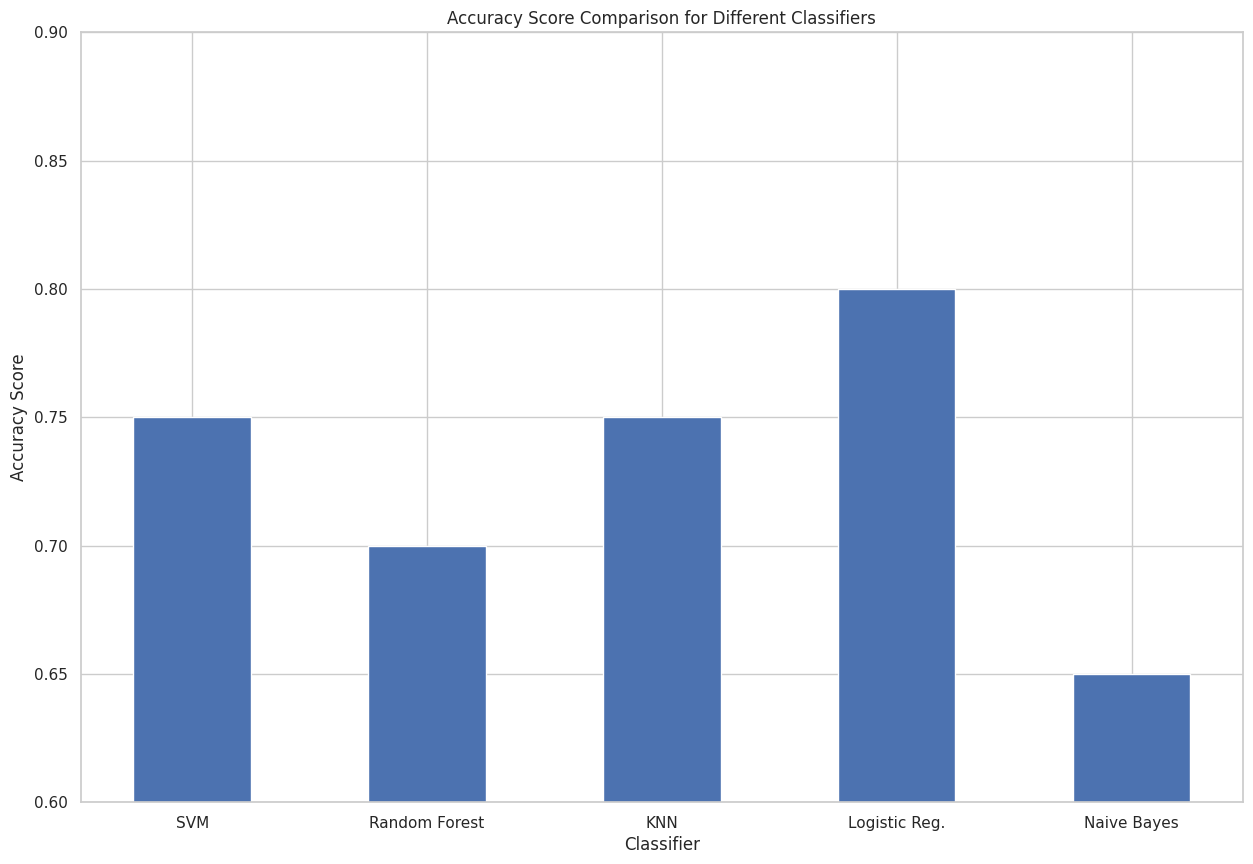

In [ ]:
# Conclusion
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Classifiers')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, average_precision_score

classifiers = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rand_forest,
    'Naive Bayes': naive_bayes
}

# Compare metrics for each classifier
for name, classifier in classifiers.items():
    # Fit the model
    classifier.fit(x_train_selected, y_train)

    # Predictions
    y_pred = classifier.predict(x_test_selected)

    # Confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classifier: {name}")
    print("Confusion Matrix:\n", conf_mat)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    print("\n")


Classifier: Logistic Regression
Confusion Matrix:
 [[ 2  2]
 [ 2 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.88      0.88      0.88        16

    accuracy                           0.80        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.80      0.80      0.80        20

Precision: 0.8750, Recall: 0.8750, F1 Score: 0.8750


Classifier: KNN
Confusion Matrix:
 [[ 2  2]
 [ 3 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.87      0.81      0.84        16

    accuracy                           0.75        20
   macro avg       0.63      0.66      0.64        20
weighted avg       0.77      0.75      0.76        20

Precision: 0.8667, Recall: 0.8125, F1 Score: 0.8387


Classifier: SVM
Confusion Matrix:
 [[ 2  2]
 [ 3 13]]
Classificati

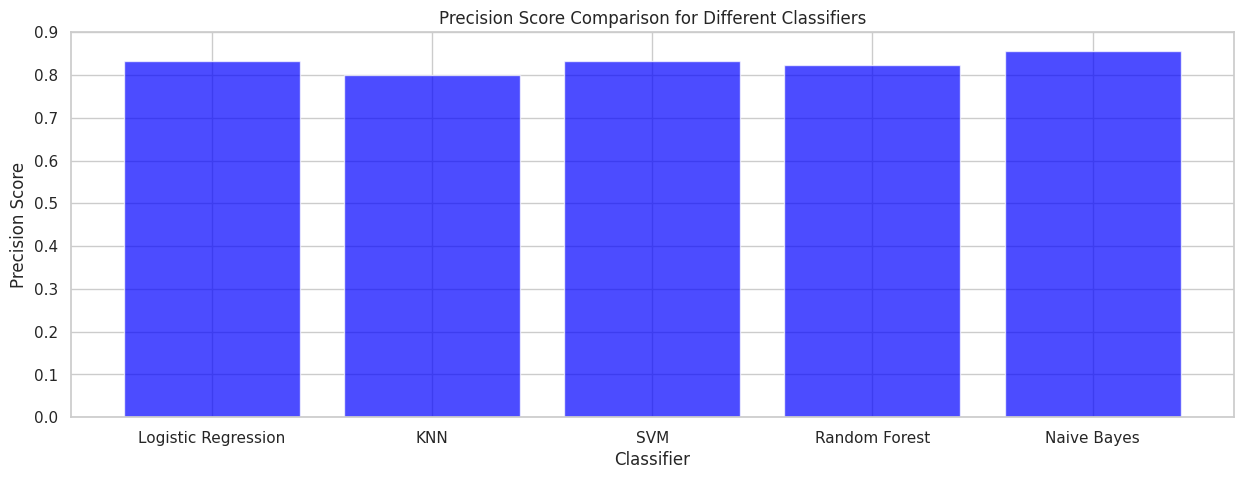

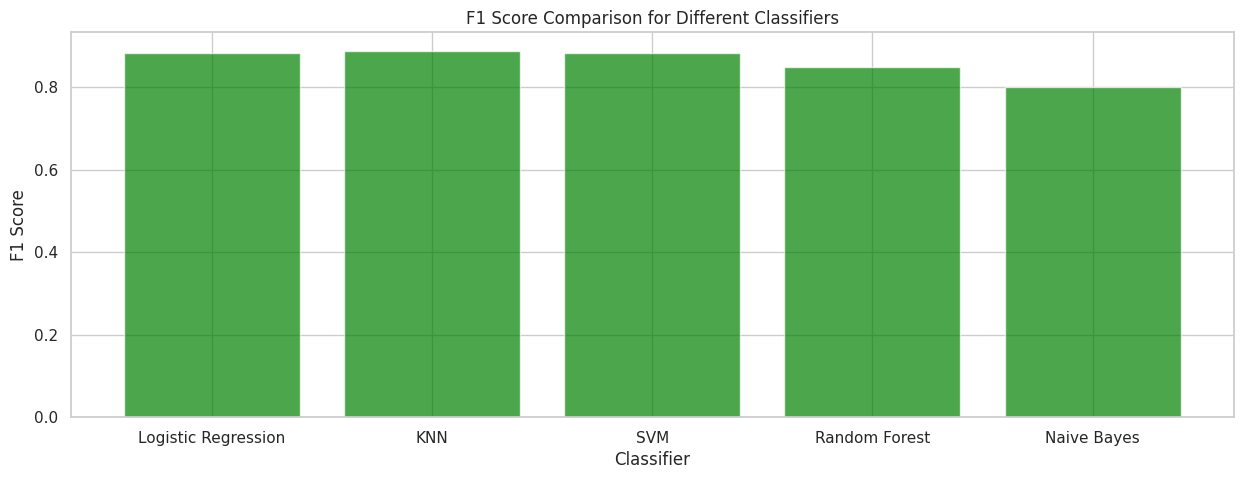

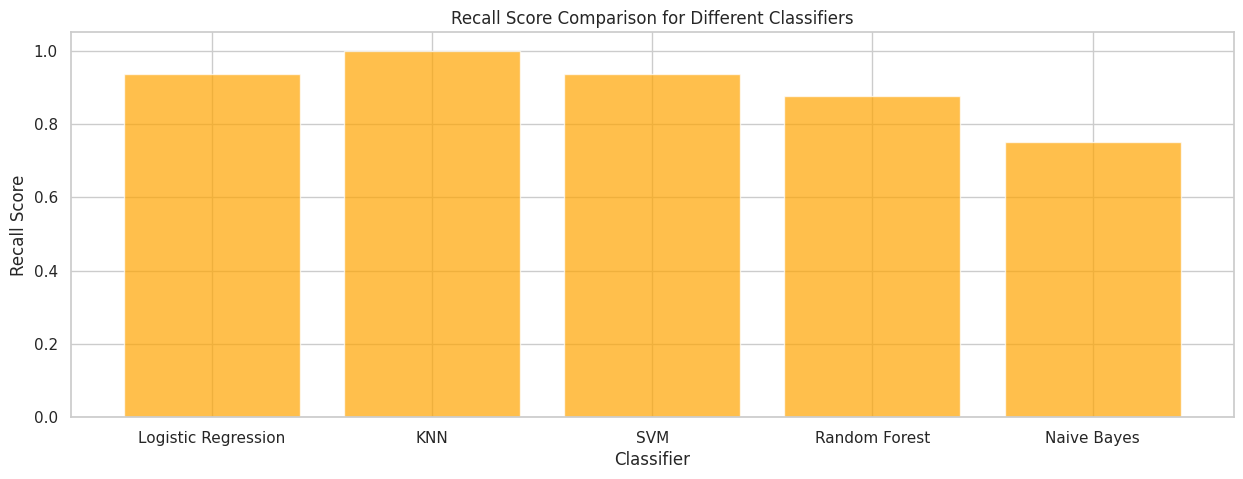

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store metric values
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []
au_prc_scores = []
conf_matrices = []
balanced_accuracy = []
matthew_score = []

classifiers = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rand_forest,
    'Naive Bayes': naive_bayes
}

# Compare metrics for each classifier
for name, classifier in classifiers.items():
    # Fit the model
    classifier.fit(x_train, y_train)

    # Predictions
    y_pred = classifier.predict(x_test)

    # Confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_mat)

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Specificity
    conf_mat = confusion_matrix(y_test, y_pred)
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])

    # Calculate AUPRC specific to each classifier
    y_probs = classifier.predict_proba(x_test)[:, 1]
    auprc = average_precision_score(y_test, y_probs)

    # Append values to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    specificity_scores.append(specificity)
    au_prc_scores.append(auprc)

# Create a separate bar plot for each metric
methods = list(classifiers.keys())
index = np.arange(len(methods))

# Plot for Precision
plt.figure(figsize=(15, 5))
plt.bar(index, precision_scores, color='blue', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Score Comparison for Different Classifiers')
plt.xticks(index, methods)
plt.show()

# Plot for F1 Score
plt.figure(figsize=(15, 5))
plt.bar(index, f1_scores, color='green', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Different Classifiers')
plt.xticks(index, methods)
plt.show()

# Plot for Recall
plt.figure(figsize=(15, 5))
plt.bar(index, recall_scores, color='orange', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Score Comparison for Different Classifiers')
plt.xticks(index, methods)
plt.show()

## **Unsupervised Methods**
* PCA

### Principal Component Analysis

In [ ]:
#Normalizing PC
PC_normalized = PC

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = PC_normalized.columns

PC[columns_to_normalize] = scaler.fit_transform(PC[columns_to_normalize])

print(PC_normalized.head())

   diagnosis_result  radius  texture  perimeter      area  smoothness  \
0               1.0  0.8750   0.0625   0.825000  0.448687    1.000000   
1               0.0  0.0000   0.1250   0.675000  0.670644    1.000000   
2               1.0  0.7500   1.0000   0.650000  0.597255    0.753425   
3               1.0  0.3125   0.3125   0.216667  0.109785    0.000000   
4               1.0  0.0000   0.5000   0.691667  0.653341    0.972603   

   compactness  symmetry  fractal_dimension  
0     0.781759  0.633136           0.590909  
1     0.133550  0.272189           0.090909  
2     0.397394  0.426036           0.159091  
3     0.801303  0.739645           1.000000  
4     0.309446  0.272189           0.136364  


In [ ]:
PC_normalized = PC_normalized.drop('diagnosis_result', axis=1)
print(PC_normalized.head())

   radius  texture  perimeter      area  smoothness  compactness  symmetry  \
0  0.8750   0.0625   0.825000  0.448687    1.000000     0.781759  0.633136   
1  0.0000   0.1250   0.675000  0.670644    1.000000     0.133550  0.272189   
2  0.7500   1.0000   0.650000  0.597255    0.753425     0.397394  0.426036   
3  0.3125   0.3125   0.216667  0.109785    0.000000     0.801303  0.739645   
4  0.0000   0.5000   0.691667  0.653341    0.972603     0.309446  0.272189   

   fractal_dimension  
0           0.590909  
1           0.090909  
2           0.159091  
3           1.000000  
4           0.136364  


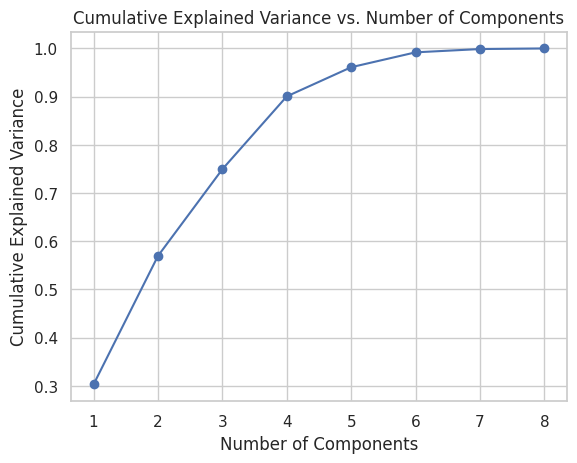

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

#To choose value for n_components later

pca = PCA(n_components=8)  #No. of features
pca.fit(PC_normalized)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

Explained variation of 3 principal components: [0.3030254  0.26655728 0.17992356]



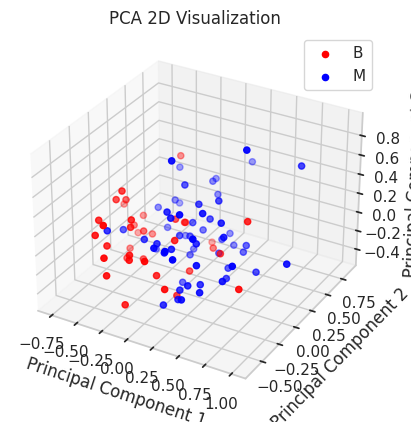

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)

x_pca = pca.fit_transform(PC_normalized)

print('Explained variation of 3 principal components: {}'.format(pca.explained_variance_ratio_))
print()

# Mapping colors to targets
color_map = {0: 'red', 1: 'blue'}

# Map 0 to 'B' and 1 to 'M'
target_names = {0: 'B', 1: 'M'}

# Creating a list of colors corresponding to each target in the dataset
colors = [color_map[target] for target in y]

# 3D Scatter plot with colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=colors)

# ax.set_title('PCA 3D Visualization')
ax.set_title('PCA 2D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
for target, color in color_map.items():
    ax.scatter([], [], [], c=color, label=target_names[target])

ax.legend()
plt.show()


Explained variation of 2 principal components: [0.3030254  0.26655728]



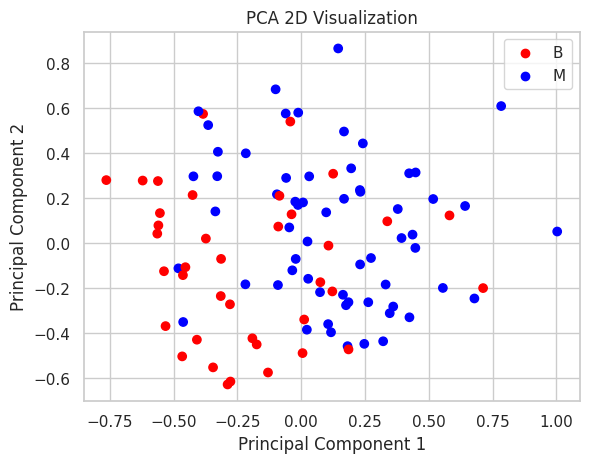

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 2-5
pca = PCA(n_components=2)  # Set n_components to 2

x_pca = pca.fit_transform(PC_normalized)

print('Explained variation of 2 principal components: {}'.format(pca.explained_variance_ratio_))
print()

# Mapping colors to targets
color_map = {0: 'red', 1: 'blue'}

# Map 0 to 'B' and 1 to 'M'
target_names = {0: 'B', 1: 'M'}

# Creating a list of colors corresponding to each target in the dataset
colors = [color_map[target] for target in y]

# 2D Scatter plot with colors
plt.figure()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors)

plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend
for target, color in color_map.items():
    plt.scatter([], [], c=color, label=target_names[target])

plt.legend()
plt.show()
